In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func
from flask import Flask, jsonify
import datetime

# Reflect Tables into SQLAlchemy ORM

In [2]:
#Read the SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [7]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [8]:
#using inspector to see columns
#date and prcp are columns
#looking to see what is in each table
measurecols = inspector.get_columns('measurement')

for x in measurecols:
    print(x)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [9]:
#only thing present is tobs
stationcols = inspector.get_columns('station')

for y in stationcols:
       print(x)

{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [10]:
#essentially just gives you the name of the station
#and lat and long
engine.execute('SELECT * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [12]:
#could join the tables on station


# Precipitation Analysis


In [13]:
#trying to find the last date in the data
#last day is August 23 ,2017
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

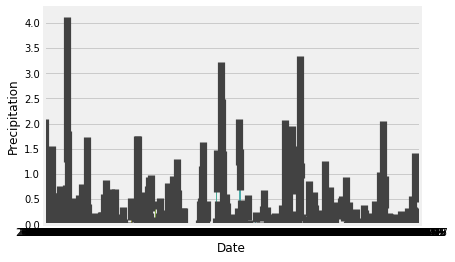

In [34]:
#a lot easier to query than filter the dataframe!!
dateprcp = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23')
#same thing now its a query, need to find the engine 
type(dateprcp)

#convert from SQLalchemy query to workable list
datelist = [i for i in dateprcp]

datedf= pd.DataFrame(datelist, columns = ['Date', 'Precipitation'])

#trying to clean up date info
datedf['Date'] = datedf['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").date())

#convert to DF
#set index as Date, sort by Date
datedf.set_index('Date')
datedf.sort_values('Date')

sns.barplot(datedf.Date, datedf['Precipitation'], data =datedf)
plt.tight_layout

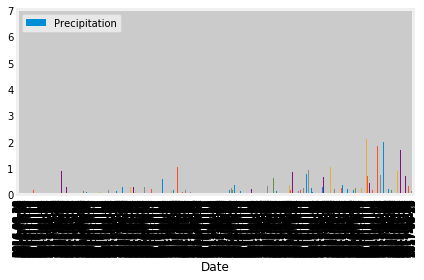

In [15]:
#tried an alternative route and didn't get anywhere
datedf.plot(x ='Date', y= 'Precipitation', kind = 'bar')
plt.tight_layout()


In [16]:
#summary stats
datedf.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [17]:
#want to see what columns are in station
statcolumns = inspector.get_columns('station')

for i in statcolumns:
    print(i)
#want to join the tables on station

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [18]:
selstation = session.query(Station.station).all()

In [19]:
numberofstations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()
numberofstations

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [21]:
#going to try and query for the names not just the station id
samestation = session.query(Measurement.station,Station.name).filter(Measurement.station == Station.station).all()

same__station_df = pd.DataFrame(data = samestation)

same__station_df.head()

,station,name
0,USC00519397,"WAIKIKI 717.2, HI US"
1,USC00519397,"WAIKIKI 717.2, HI US"
2,USC00519397,"WAIKIKI 717.2, HI US"
3,USC00519397,"WAIKIKI 717.2, HI US"
4,USC00519397,"WAIKIKI 717.2, HI US"


In [22]:
#number of station
# Design a query to show how many stations are available in this dataset?

station = [Measurement.station]

stationinfo = session.query(*station).all()

stationdf = pd.DataFrame(data = stationinfo, columns= ['Station'])

stationcount= stationdf['Station'].value_counts()

stationcountdf = stationcount.to_frame()

#station and counts in desc order
#could enhance by joining with the other dataframe and giving the full station name
stationcountdf.sort_values(by = 'Station',ascending = False)

#The station ID and the Number of entries for that station

,Station
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

stationweather = [Measurement.station, Measurement.tobs]

stationsweather = session.query(*stationweather).all()

statweatherdf = pd.DataFrame(stationsweather, columns= ['Station', 'Temperature'])

weathergroup = statweatherdf.groupby('Station')
#grouped by station, then found the max and min for each station, could compile into a dataframe to make it more 
#presentable

stationmax = weathergroup.max()
stationmin = weathergroup.min()
stationmean = weathergroup.mean()

station_temp = pd.merge(stationmax, stationmin, on ='Station')

station_temp_info = pd.merge(station_temp, stationmean, on='Station')
station_temp_info.rename(columns={'Temperature_x': 'High Temps', 'Temperature_y': 'Low Temps', 'Temperature': 'Avg Temps'})

,High Temps,Low Temps,Avg Temps
Station,,,
USC00511918,87.0,53.0,71.615968
USC00513117,85.0,59.0,72.689184
USC00514830,85.0,58.0,74.873297
USC00516128,84.0,58.0,70.915008
USC00517948,87.0,58.0,74.684402
USC00518838,83.0,58.0,72.724070
USC00519281,85.0,54.0,71.663781
USC00519397,87.0,56.0,74.553231
USC00519523,85.0,56.0,74.543649


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#station USC00519281 has the most entries
#going to try and query where station = USC00519281

#need to create another histogram just looking at the year, station is not neccessary
usc81 = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
                    filter (Measurement.station =='USC00519281', Measurement.date >= '2016-08-23')

#need to convert query to list
usc81list = [x for x in usc81]

#convert to dataframe
usc81df = pd.DataFrame(usc81list, columns= ['Station', 'Temperature', 'Date'])
a = usc81df['Temperature'].value_counts()
# a low of 54 and a high of 85

#has 352 rows
usc81df.head()

,Station,Temperature,Date
0,USC00519281,77.0,2016-08-23
1,USC00519281,77.0,2016-08-24
2,USC00519281,80.0,2016-08-25
3,USC00519281,80.0,2016-08-26
4,USC00519281,75.0,2016-08-27


In [25]:
#binning the data to graph 
bins = [56,59,62,64,66,68,70,72,74,76,78,80,83]

group_labels = ['56-59', '59-62', '62-64', '64-66', '66-68', '68-70', '70-72', '72-74', '74-76', '76-78', '78-80', '80-83']

bintemp = pd.cut(usc81df['Temperature'], bins, labels= group_labels)

bintempdf = bintemp.to_frame()

bintempdf.head()

,Temperature
0,76-78
1,76-78
2,78-80
3,78-80
4,74-76


(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 53., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

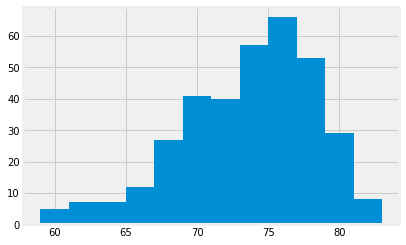

In [26]:
plt.hist(usc81df.Temperature, bins= 12)

Text(0.5,0,'Temperature at Station USC00519281')

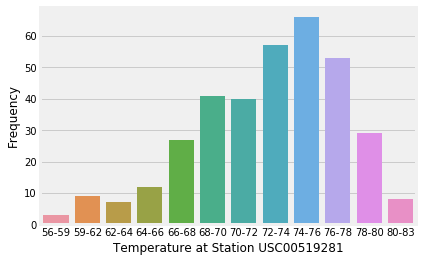

In [27]:
#didn't really like the histogram so created a bar graph
sns.countplot(x= bintempdf.Temperature,data = bintempdf,)
plt.ylabel('Frequency')
plt.xlabel('Temperature at Station USC00519281')

# Temperature Analysis

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#trip was from aug 23,2016 to aug 23,2017

triptemp = calc_temps('2016-08-23','2017-08-23')
triptemp

[(58.0, 74.59058295964125, 87.0)]

In [30]:
#returns a list of tuples
#how to navigate the tuple
mintemp = triptemp[0][0]
avgtemp = triptemp[0][1]
hightemp= triptemp[0][2]

error = hightemp-mintemp

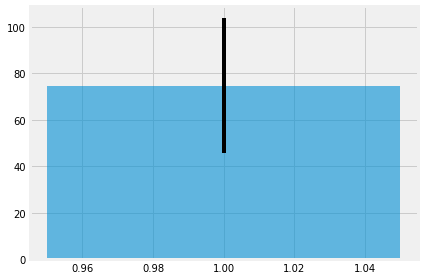

In [31]:
#bar plot
plt.bar(1, avgtemp ,yerr = error, alpha= 0.6, align= 'center', width = .1)
plt.tight_layout()


# Optional Challenge

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]